# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.visualizer.main import Visualizer
from IPython.display import Markdown as md
import dataframe_image as dfi

# Przydatne funkcje 

In [5]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [6]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

# Generowanie losowych punktów na płaszczyźnie

In [7]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """

    # Zoptymalizowac generowanie randomowych punktow

    points = []
    for i in range(n):
        x = np.random.uniform(left, right)
        y = np.random.uniform(left, right)
        points.append((x, y))

    return points

<span style="color:red">1.</span> Genracja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$.

In [8]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

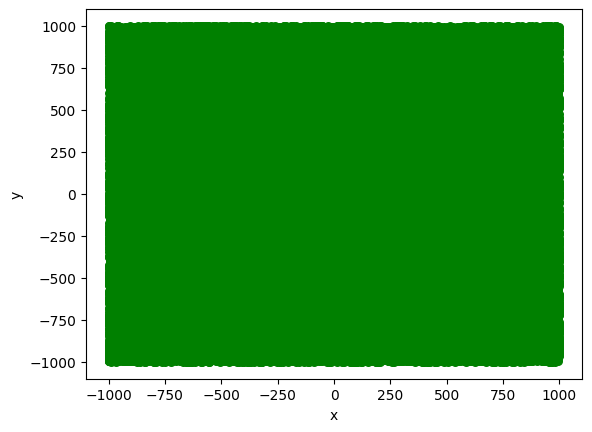

In [9]:
draw_points(points_a)

In [10]:
df_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])

In [11]:
df_a.head()

,X,Y
0,468.562508,948.696240
1,580.971534,-610.685831
2,392.458095,374.817269
3,874.529761,-479.085366
4,-464.743182,-759.013741


<span style="color:red">2.</span> Generacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$.

In [12]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

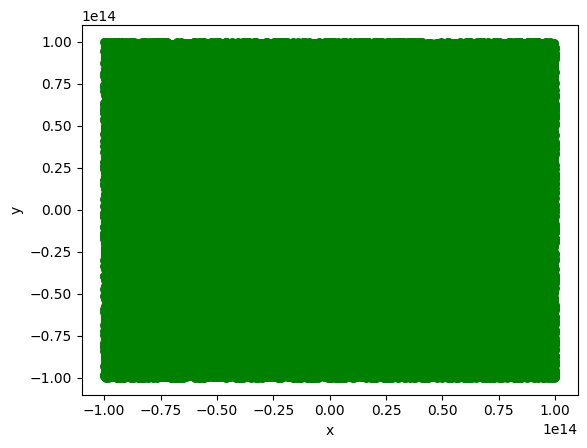

In [13]:
draw_points(points_b)

### Generacja lososwych punktów na okręgu.

In [14]:
def generate_circle_points(O, R, n = 1000):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    points = []
    for _ in range(n):
        angle = 2 * np.pi * np.random.uniform()
        points.append((R * np.cos(angle), R * np.sin(angle)))
    return points

<span style="color:red">3.</span> Generacja $1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

In [15]:
points_c = generate_circle_points((0, 0), 100)

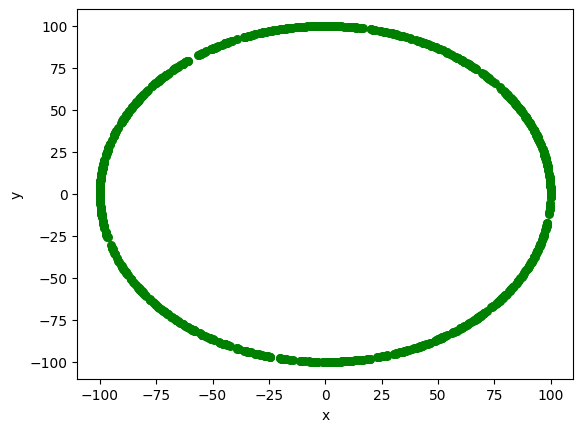

In [16]:
draw_points(points_c)

### Generacja punktów współliniowych.

In [17]:
def generate_collinear_points(a, b, n=100):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """

    points = []
    xt = b[0] - a[0]
    yt = b[1] - a[1]
    for i in range(n):
        t = np.random.uniform()
        points.append((xt * t + a[0], yt * t + a[1] ))
    
    return points

<span style="color:red">4.</span>  Generacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ dla $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$.   
Gdzie $ a = (-1.0, 0.0)$, $ b = (1.0, 0.1)$.

In [18]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

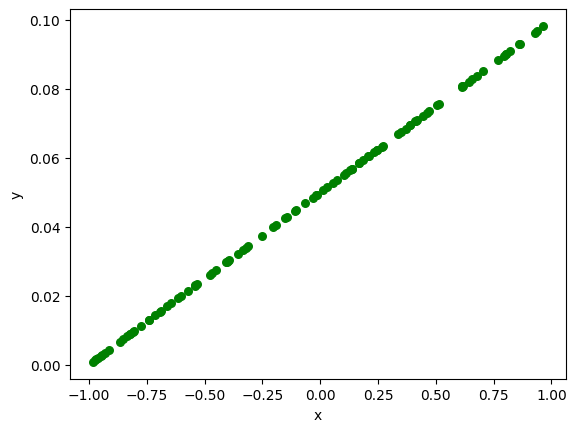

In [19]:
draw_points(points_d)

# Porównanie funkcji wyliczających wyznacznik.

In [20]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return a[0] * (b[1] - c[1]) - a[1] * (b[0] - c[0]) + b[0] * c[1] - b[1] * c[0]

In [21]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    M = np.array([[a[0],a[1], 1],
                  [b[0], b[1], 1],
                  [c[0], c[1], 1]
                  ])

    return np.linalg.det(M)

In [22]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0] - c[0]) * (b[1] - c[1]) - ((a[1] - c[1]) * (b[0] - c[0]))

In [23]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    M = np.array([[a[0] - c[0], a[1] - c[1]],
                  [b[0] - c[0], b[1] - c[1]]
                  ])
    
    return np.linalg.det(M)

<span style="color:red">5.</span> Implementacja funkcji kategoryzującej punkty odnośnie ich położenia względem prostej.

In [24]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """

    categories = [[], [], []]
    for c in points:
        det = mat_det_func(a,b,c)
        if abs(det) < eps: 
            categories[1].append(c)
        elif det > 0:
            categories[0].append(c)
        else:
            categories[2].append(c)

    return categories

In [25]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

#### Wizualizacja sklasyfikowanych punktów. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

<span style="color:red">6.</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$. $\varepsilon = 10^{-2}$.

In [26]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10**-2)

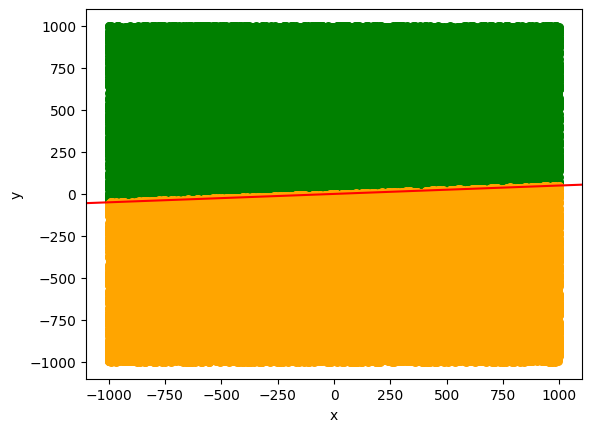

In [27]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [28]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_a_left)))

Punktów po lewej od prostej: 49972

In [29]:
# @hidden_cell
md("Punktów na prostej: {}".format(len(classified_points_a_mid)))

Punktów na prostej: 0

In [30]:
# @hidden_cell
md("Punktów po prawej od prostej: {}".format(len(classified_points_a_right)))

Punktów po prawej od prostej: 50028

<span style="color:red">7.</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$. $\varepsilon = 10^{-4}$.

In [31]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -4)

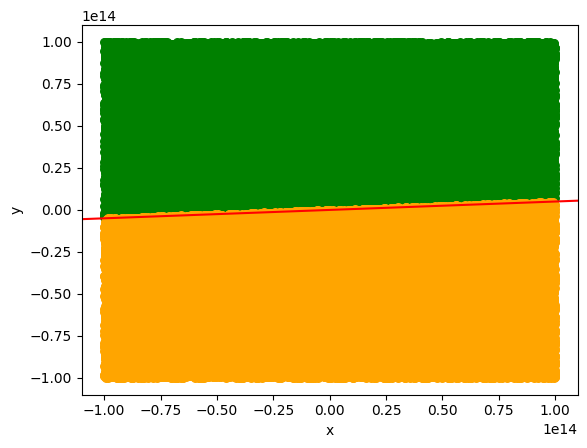

In [32]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [33]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_b_left)))

Punktów po lewej od prostej: 49958

In [34]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_b_mid)))

Punktów na prostej: 0

In [35]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_b_right)))

Punktów po prawej od prostej: 50042

<span style="color:red">8.</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. $\varepsilon = 10^{-4}$.

In [36]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10**-4)

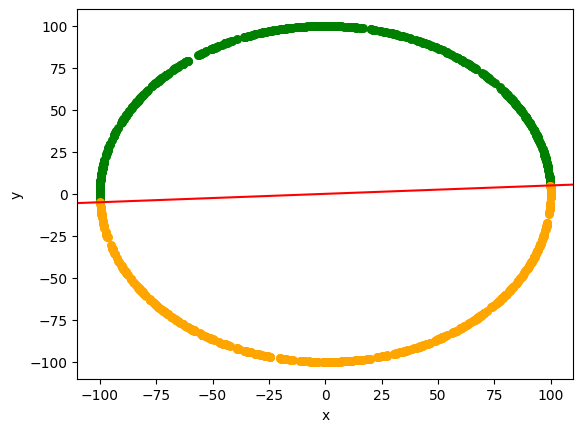

In [37]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [38]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_c_left)))

Punktów po lewej od prostej: 524

In [39]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_c_mid)))

Punktów na prostej: 0

In [40]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_c_right)))

Punktów po prawej od prostej: 476

<span style="color:red">10.</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej. $\varepsilon = 10^{-12}$.

In [41]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

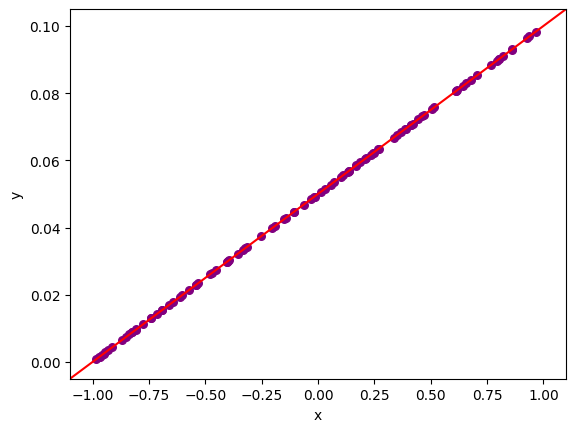

In [42]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [43]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_d_left)))

Punktów po lewej od prostej: 0

In [44]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_d_mid)))

Punktów na prostej: 100

In [45]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_d_right)))

Punktów po prawej od prostej: 0

---

# Testy klasyfikacyjne dla różnych wartości $\varepsilon$.

#### <span style="color:red">1.</span> $\varepsilon = 10^{-8}$.

<span style="color:red">1.1</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$. $\varepsilon = 10^{-8}$.

In [46]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10**-8)

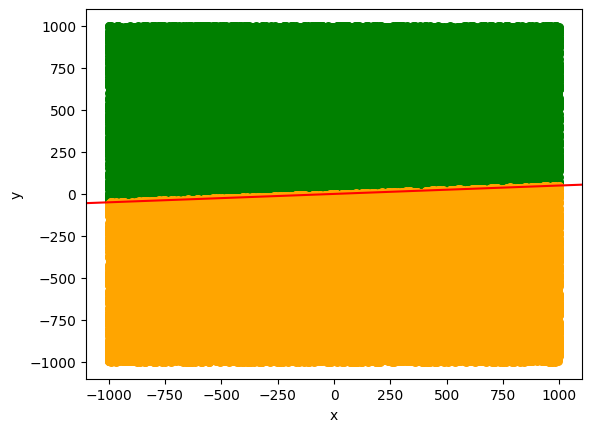

In [47]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [48]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_a_left)))

Punktów po lewej od prostej: 49972

In [49]:
# @hidden_cell
md("Punktów na prostej: {}".format(len(classified_points_a_mid)))

Punktów na prostej: 0

In [50]:
# @hidden_cell
md("Punktów po prawej od prostej: {}".format(len(classified_points_a_right)))

Punktów po prawej od prostej: 50028

<span style="color:red">1.2</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$. $\varepsilon = 10^{-8}$.

In [51]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -8)

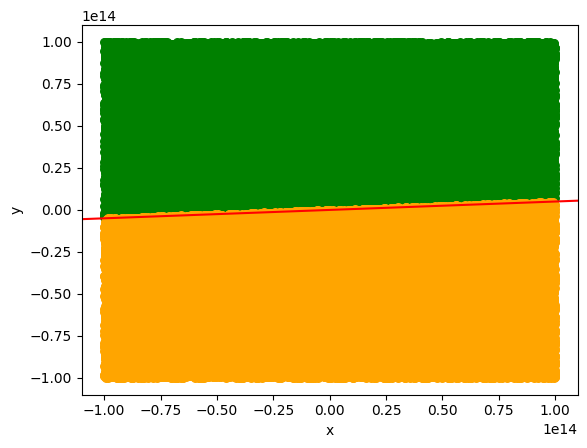

In [52]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [53]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_b_left)))

Punktów po lewej od prostej: 49958

In [54]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_b_mid)))

Punktów na prostej: 0

In [55]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_b_right)))

Punktów po prawej od prostej: 50042

<span style="color:red">1.3</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. $\varepsilon = 10^{-8}$.

In [56]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10**-8)

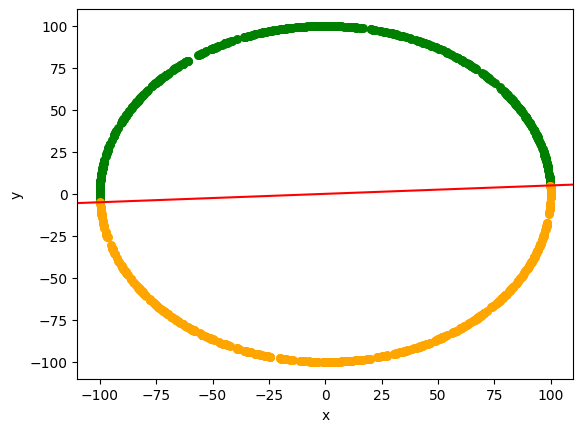

In [57]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [58]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_c_left)))

Punktów po lewej od prostej: 524

In [59]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_c_mid)))

Punktów na prostej: 0

In [60]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_c_right)))

Punktów po prawej od prostej: 476

<span style="color:red">1.4</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej.$\varepsilon = 10^{-8}$.

In [61]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -8)

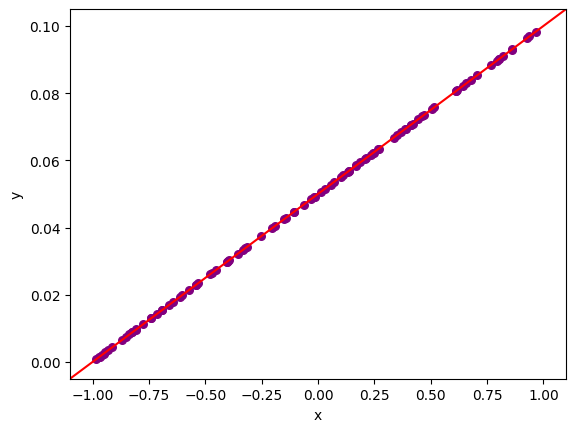

In [62]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [63]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_d_left)))

Punktów po lewej od prostej: 0

In [64]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_d_mid)))

Punktów na prostej: 100

In [65]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_d_right)))

Punktów po prawej od prostej: 0

#### <span style="color:red">2.</span> $\varepsilon = 10^{-10}$.

<span style="color:red">2.1</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$. $\varepsilon = 10^{-10}$.

In [66]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10**-10)

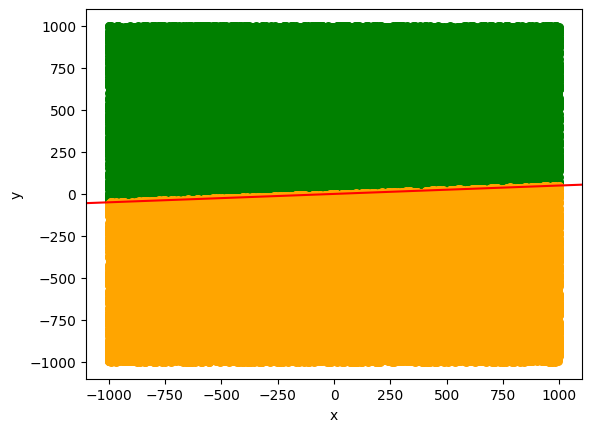

In [67]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [68]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_a_left)))

Punktów po lewej od prostej: 49972

In [69]:
# @hidden_cell
md("Punktów na prostej: {}".format(len(classified_points_a_mid)))

Punktów na prostej: 0

In [70]:
# @hidden_cell
md("Punktów po prawej od prostej: {}".format(len(classified_points_a_right)))

Punktów po prawej od prostej: 50028

<span style="color:red">2.2</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$. $\varepsilon = 10^{-10}$.

In [71]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -10)

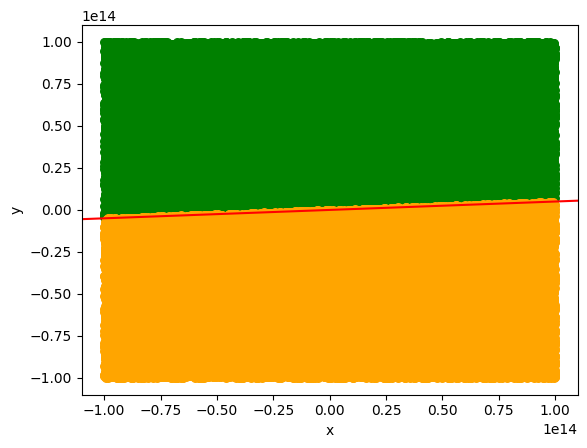

In [72]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [73]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_b_left)))

Punktów po lewej od prostej: 49958

In [74]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_b_mid)))

Punktów na prostej: 0

In [75]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_b_right)))

Punktów po prawej od prostej: 50042

<span style="color:red">2.3</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. $\varepsilon = 10^{-10}$.

In [76]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10**-10)

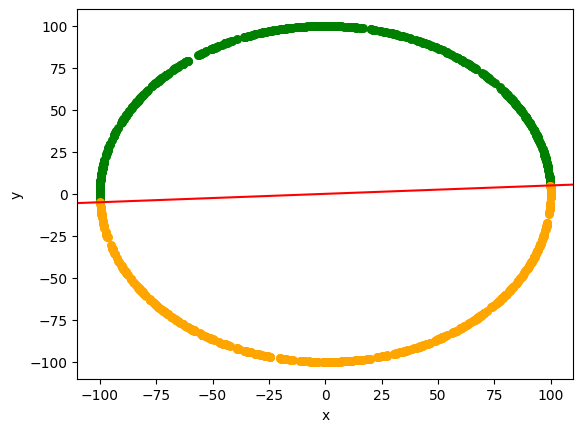

In [77]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [78]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_c_left)))

Punktów po lewej od prostej: 524

In [79]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_c_mid)))

Punktów na prostej: 0

In [80]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_c_right)))

Punktów po prawej od prostej: 476

<span style="color:red">2.4</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej. $\varepsilon = 10^{-10}$.

In [81]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -10)

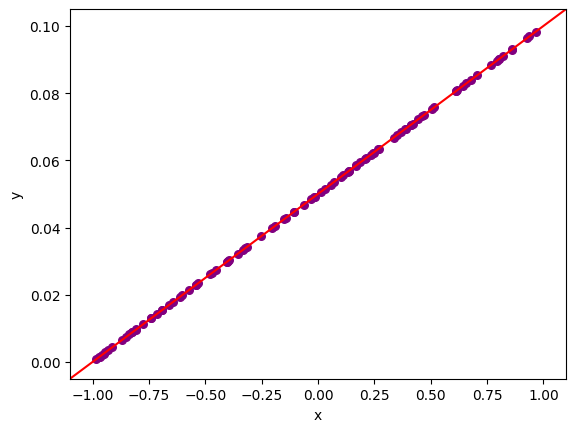

In [82]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [83]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_d_left)))

Punktów po lewej od prostej: 0

In [84]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_d_mid)))

Punktów na prostej: 100

In [85]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_d_right)))

Punktów po prawej od prostej: 0

#### <span style="color:red">3.</span> $\varepsilon = 10^{-12}$.

<span style="color:red">3.1</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$. $\varepsilon = 10^{-12}$.

In [86]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10**-12)

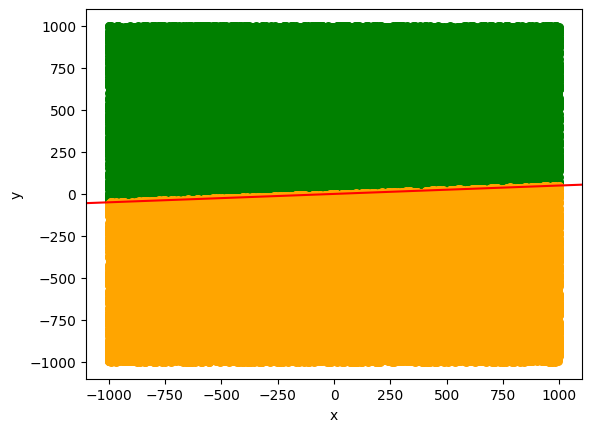

In [87]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [88]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_a_left)))

Punktów po lewej od prostej: 49972

In [89]:
# @hidden_cell
md("Punktów na prostej: {}".format(len(classified_points_a_mid)))

Punktów na prostej: 0

In [90]:
# @hidden_cell
md("Punktów po prawej od prostej: {}".format(len(classified_points_a_right)))

Punktów po prawej od prostej: 50028

<span style="color:red">3.2</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$. $\varepsilon = 10^{-12}$.

In [91]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)

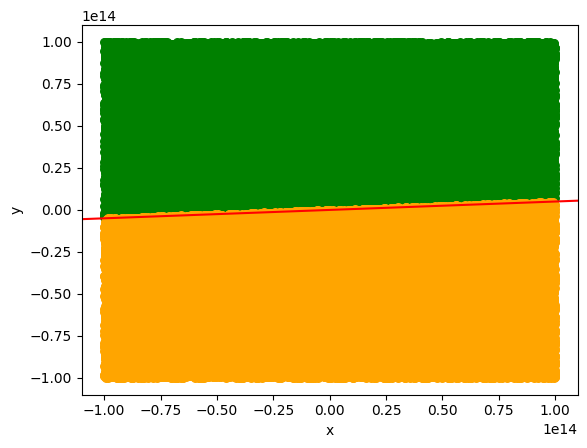

In [92]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [93]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_b_left)))

Punktów po lewej od prostej: 49958

In [94]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_b_mid)))

Punktów na prostej: 0

In [95]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_b_right)))

Punktów po prawej od prostej: 50042

<span style="color:red">3.3</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. $\varepsilon = 10^{-12}$.

In [96]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10**-12)

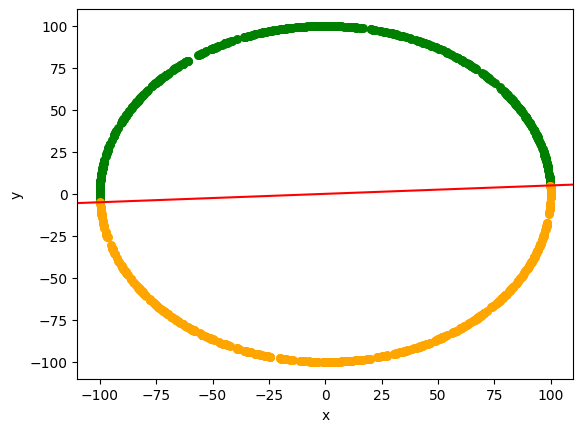

In [97]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [98]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_c_left)))

Punktów po lewej od prostej: 524

In [99]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_c_mid)))

Punktów na prostej: 0

In [100]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_c_right)))

Punktów po prawej od prostej: 476

<span style="color:red">3.4</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej. $\varepsilon = 10^{-12}$.

In [101]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

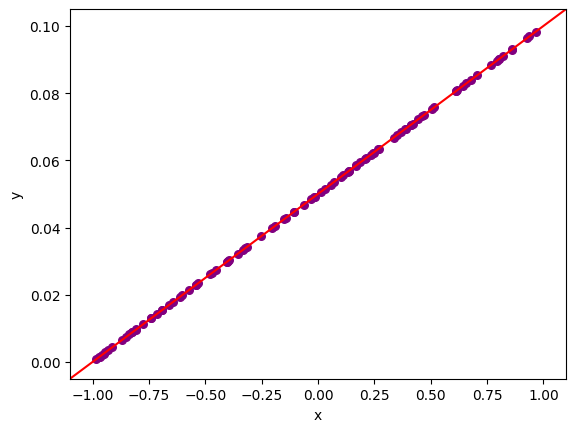

In [102]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [103]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_d_left)))

Punktów po lewej od prostej: 0

In [104]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_d_mid)))

Punktów na prostej: 100

In [105]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_d_right)))

Punktów po prawej od prostej: 0

#### <span style="color:red">4.</span> $\varepsilon = 10^{-14}$.

<span style="color:red">4.1</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$. $\varepsilon = 10^{-14}$.

In [159]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10**-14)

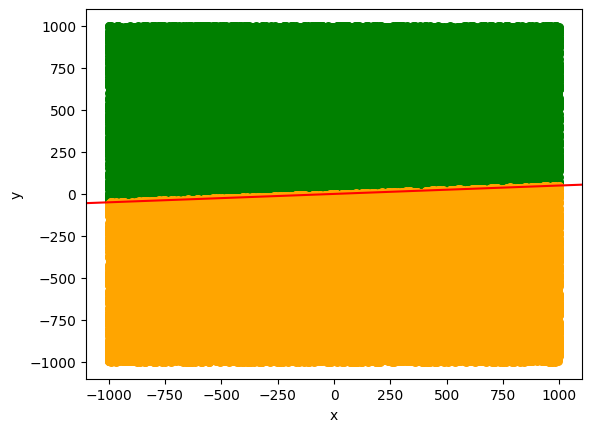

In [160]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [161]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_a_left)))

Punktów po lewej od prostej: 49972

In [162]:
# @hidden_cell
md("Punktów na prostej: {}".format(len(classified_points_a_mid)))

Punktów na prostej: 0

In [163]:
# @hidden_cell
md("Punktów po prawej od prostej: {}".format(len(classified_points_a_right)))

Punktów po prawej od prostej: 50028

<span style="color:red">4.2</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$. $\varepsilon = 10^{-14}$.

In [164]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -14)

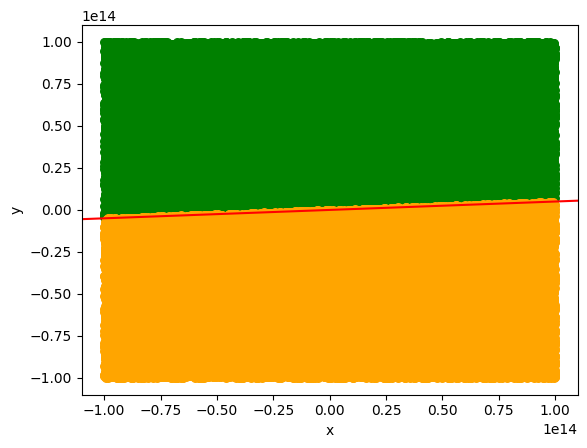

In [165]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [166]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_b_left)))

Punktów po lewej od prostej: 49958

In [167]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_b_mid)))

Punktów na prostej: 0

In [168]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_b_right)))

Punktów po prawej od prostej: 50042

<span style="color:red">4.3</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. $\varepsilon = 10^{-14}$.

In [169]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10**-14)

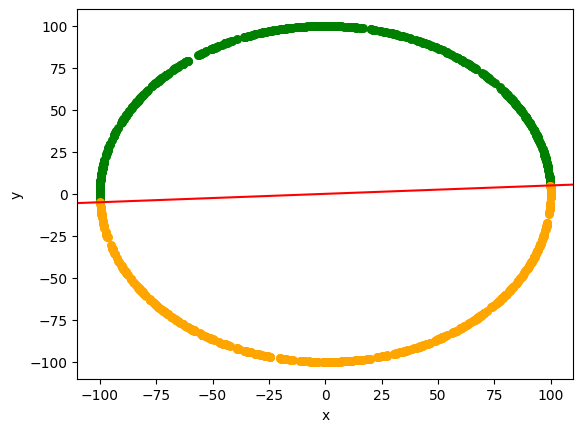

In [170]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [171]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_c_left)))

Punktów po lewej od prostej: 524

In [172]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_c_mid)))

Punktów na prostej: 0

In [173]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_c_right)))

Punktów po prawej od prostej: 476

<span style="color:red">4.4</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej. $\varepsilon = 10^{-14}$.

In [174]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -14)

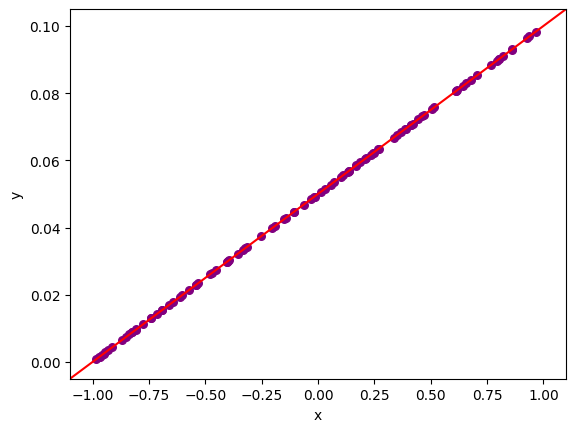

In [175]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [176]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_d_left)))

Punktów po lewej od prostej: 0

In [177]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_d_mid)))

Punktów na prostej: 100

In [178]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_d_right)))

Punktów po prawej od prostej: 0

#### <span style="color:red">5.</span> Tabela

In [144]:
eps = [5, 3, 1,-2, -4, -8, -12, -14, -16, -18, -20]

def classified_set(points, eps):
    res = [[] for _ in range(3)]
    for i in range(len(eps)): 
        classified_left,classified_mid, classified_right = categorize_points(points, a, b, mat_det_2x2_lib, 10 ** eps[i])
        res[0].append(len(classified_left))
        res[1].append(len(classified_mid))
        res[2].append(len(classified_right))
    return res

In [146]:
results = []
results += classified_set(points_a, eps)
results += classified_set(points_b, eps)
results += classified_set(points_c, eps)
results += classified_set(points_d, eps)
results

[[0, 25006, 49726, 49972, 49972, 49972, 49972, 49972, 49972, 49972, 49972],
 [100000, 49861, 506, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 25133, 49768, 50028, 50028, 50028, 50028, 50028, 50028, 50028, 50028],
 [49954, 49954, 49954, 49954, 49954, 49954, 49954, 49954, 49954, 49954, 49954],
 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
 [50036, 50036, 50036, 50036, 50036, 50036, 50036, 50036, 50036, 50036, 50036],
 [0, 0, 510, 524, 524, 524, 524, 524, 524, 524, 524],
 [1000, 1000, 29, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 461, 476, 476, 476, 476, 476, 476, 476, 476],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 23],
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 44, 40],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 37]]

In [149]:
row_headers = ["Zbiór a", " ", " ", "Zbiór b", " ", " ", "Zbiór c" ," ", " ", "Zbiór d" ," ", " "]
res = results
datae = {}
datae["eps"] = row_headers
datae[""] = ["po lewej", "na prostej", "po prawej"] * 4
for i in range(len(res[0])):
    datae[eps[i]] = [res[j][i] for j in range(len(results))]
    # print(datae[eps[i]])

df_eps = pd.DataFrame(data = datae)
df_eps

,eps,,5,3,1,-2,-4,-8,-12,-14,-16,-18,-20
0,Zbiór a,po lewej,0,25006,49726,49972,49972,49972,49972,49972,49972,49972,49972
1,,na prostej,100000,49861,506,0,0,0,0,0,0,0,0
2,,po prawej,0,25133,49768,50028,50028,50028,50028,50028,50028,50028,50028
3,Zbiór b,po lewej,49954,49954,49954,49954,49954,49954,49954,49954,49954,49954,49954
4,,na prostej,10,10,10,10,10,10,10,10,10,10,10
5,,po prawej,50036,50036,50036,50036,50036,50036,50036,50036,50036,50036,50036
6,Zbiór c,po lewej,0,0,510,524,524,524,524,524,524,524,524
7,,na prostej,1000,1000,29,0,0,0,0,0,0,0,0
8,,po prawej,0,0,461,476,476,476,476,476,476,476,476
9,Zbiór d,po lewej,0,0,0,0,0,0,0,0,0,20,23


In [150]:
#dfi.export(df_eps, 'eps_compar.png')

# Porównywanie czasów klasyfikacji dla różnych funkcji obliczających wyznacznik.

Zbiór testowy ```test_set```.

In [106]:
test_set = generate_uniform_points(-10^4, 10^4, 10 ** 6)

#### <span style="color:red">1.</span> Numpy $2\times 2$. $604 [ms]$

In [107]:
%%timeit
classified_points_nump2_left,classified_points_nump2_mid,classified_points_nump2_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)

577 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


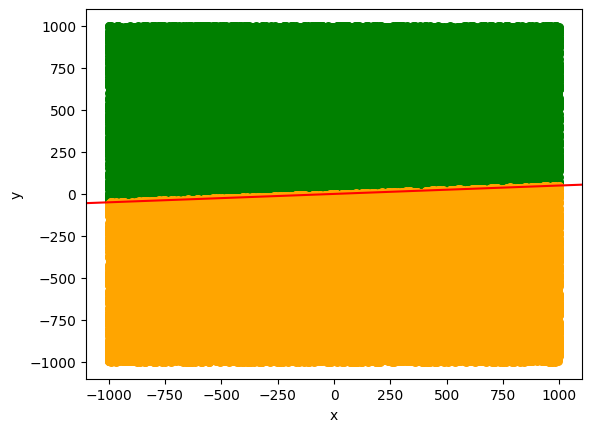

In [108]:
classified_points_nump2_left,classified_points_nump2_mid,classified_points_nump2_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)
draw_line(classified_points_nump2_left, classified_points_nump2_mid, classified_points_nump2_right)

In [109]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_nump2_left)))

Punktów po lewej od prostej: 49972

In [110]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_nump2_mid)))

Punktów na prostej: 0

In [111]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_nump2_right)))

Punktów po prawej od prostej: 50028

#### <span style="color:red">2.</span> Numpy $3\times 3$. $595 [ms]$

In [112]:
%%timeit
classified_points_nump3_left,classified_points_nump3_mid,classified_points_nump3_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)

545 ms ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


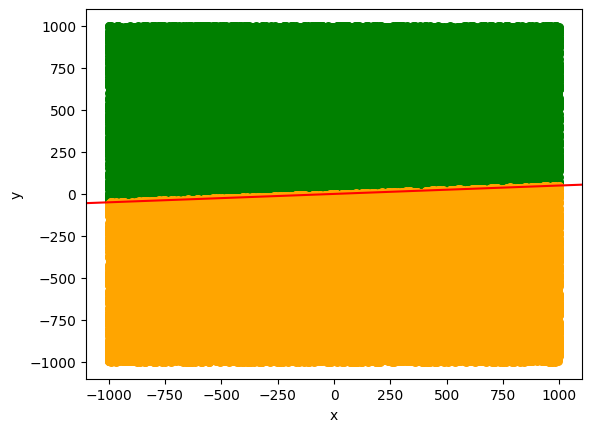

In [113]:
classified_points_nump3_left,classified_points_nump3_mid,classified_points_nump3_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)
draw_line(classified_points_nump3_left, classified_points_nump3_mid, classified_points_nump3_right)

In [114]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_nump3_left)))

Punktów po lewej od prostej: 49972

In [115]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_nump3_mid)))

Punktów na prostej: 0

In [116]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_nump3_right)))

Punktów po prawej od prostej: 50028

#### <span style="color:red">3.</span> Własny $2\times 2$. $575[ms]$

In [117]:
%%timeit
classified_points_mat2_left,classified_points_mat2_mid,classified_points_mat2_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)

547 ms ± 3.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


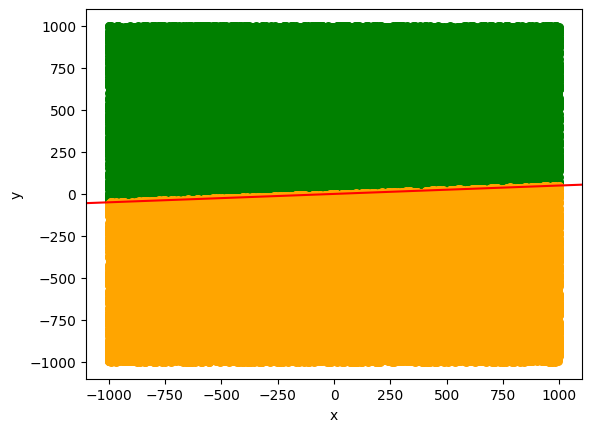

In [118]:
classified_points_mat2_left,classified_points_mat2_mid,classified_points_mat2_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)
draw_line(classified_points_mat2_left, classified_points_mat2_mid, classified_points_mat2_right)

In [119]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_mat2_left)))

Punktów po lewej od prostej: 49972

In [120]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_mat2_mid)))

Punktów na prostej: 0

In [121]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_mat2_right)))

Punktów po prawej od prostej: 50028

#### <span style="color:red">4.</span> Własny $3\times 3$. $586 [ms]$

In [ ]:
%%timeit
classified_points_mat3_left,classified_points_mat3_mid,classified_points_mat3_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)

544 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


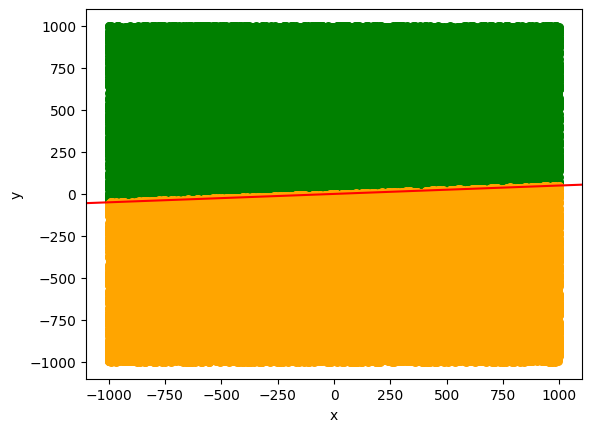

In [ ]:
classified_points_mat3_left,classified_points_mat3_mid,classified_points_mat3_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)
draw_line(classified_points_mat3_left, classified_points_mat3_mid, classified_points_mat3_right)

In [ ]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_mat3_left)))

Punktów po lewej od prostej: 49972

In [ ]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_mat3_mid)))

Punktów na prostej: 0

In [ ]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_mat3_right)))

Punktów po prawej od prostej: 50028

In [ ]:
row_headers = ["Zbiór a", " ", " ", "Zbiór b", " ", " ", "Zbiór c" ," ", " ", "Zbiór d" ," ", " "]
res = results
datae = {}
datae["eps"] = row_headers
datae[""] = ["po lewej", "na prostej", "po prawej"] * 4
for i in range(len(res[0])):
    datae[eps[i]] = [res[j][i] for j in range(len(results))]
    # print(datae[eps[i]])

df_eps = pd.DataFrame(data = datae)
df_eps

In [122]:
%%timeit
classified_points_mat3_left,classified_points_mat3_mid,classified_points_mat3_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)

544 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


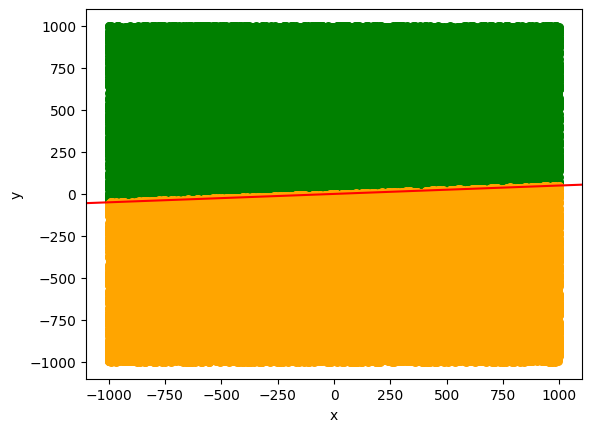

In [123]:
classified_points_mat3_left,classified_points_mat3_mid,classified_points_mat3_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10**-2)
draw_line(classified_points_mat3_left, classified_points_mat3_mid, classified_points_mat3_right)

In [124]:
# @hidden_cell
md("Punktów po lewej od prostej: {}".format(len(classified_points_mat3_left)))

Punktów po lewej od prostej: 49972

In [125]:
# @hidden_cell

md("Punktów na prostej: {}".format(len(classified_points_mat3_mid)))

Punktów na prostej: 0

In [126]:
# @hidden_cell

md("Punktów po prawej od prostej: {}".format(len(classified_points_mat3_right)))

Punktów po prawej od prostej: 50028

#### <span style="color:red">5.</span> Tabela

In [157]:
row_headers = ["Numpy 2x2", "Numpy 3x3", "Własny 2x2", "Własny 3x3"]
res = results
data_wyz = {}
data_wyz[" "] = ["Średni czas klasyfikacji [ms]"]
data_wyz["Numpy 2x2"] = [604]
data_wyz["Numpy 3x3"] = [595]
data_wyz["Własny 2x2"] = [575]
data_wyz["Własny 3x3"] = [586]


df_wyz = pd.DataFrame(data = data_wyz)
df_wyz

,,Numpy 2x2,Numpy 3x3,Własny 2x2,Własny 3x3
0,Średni czas klasyfikacji [ms],604,595,575,586


In [158]:
#dfi.export(df_wyz, 'wyz.png')

# Testy precyzji float64 i float32.

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
W tym celu stworzymy nowy pasujący do ćwiczenia zbiór punktów.

In [127]:
float_test = generate_collinear_points((-1.0, 0.0), (1.0,0.1), 10000)

#### <span style="color:red">1.</span> float64

In [128]:
eps = [-4, -8, -12, -14, -16, -18, -20, -22, -24, -26]
results64 = []
for e in eps: 
    _,classified_points_f64_mid,_ = categorize_points(float_test, a, b, mat_det_2x2_lib, 10 ** e)
    results64.append(len(classified_points_f64_mid))

In [129]:
results64

[10000, 10000, 10000, 10000, 10000, 4067, 3855, 3855, 3855, 3855]

#### <span style="color:red">2.</span> float32

In [130]:
f_float32 = np.float32(float_test)

In [131]:
results32 = []
for e in eps: 
    _,classified_points_f32_mid,_ = categorize_points(f_float32, a, b, mat_det_2x2_lib, 10 ** e)
    results32.append(len(classified_points_f32_mid))

In [132]:
results32

[10000, 10000, 1522, 1522, 1522, 362, 361, 361, 361, 361]

#### <span style="color:red">3.</span> Podsumowanie

In [135]:
row_headers = ["float64", "float32"]
res = [results64] + [results32]

datae = {}
datae["eps"] = row_headers
for i in range(len(res[0])):
    datae[eps[i]] = [res[0][i], res[1][i]]
    print(datae[eps[i]])

df_eps = pd.DataFrame(data = datae)
df_eps

[10000, 10000]
[10000, 10000]
[10000, 1522]
[10000, 1522]
[10000, 1522]
[4067, 362]
[3855, 361]
[3855, 361]
[3855, 361]
[3855, 361]


,eps,-4,-8,-12,-14,-16,-18,-20,-22,-24,-26
0,float64,10000,10000,10000,10000,10000,4067,3855,3855,3855,3855
1,float32,10000,10000,1522,1522,1522,362,361,361,361,361


In [136]:
#dfi.export(df_float, 'eps.png')